In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d pavansanagapati/images-dataset

 99% 1.00G/1.01G [00:09<00:00, 148MB/s]
100% 1.01G/1.01G [00:09<00:00, 116MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/images-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 23963, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 23963 (delta 33), reused 43 (delta 15), pack-reused 23881
Receiving objects: 100% (23963/23963), 14.19 MiB | 19.53 MiB/s, done.
Resolving deltas: 100% (16863/16863), done.


In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd



In [14]:
model = YOLO("yolov8m-seg.pt")

100%|██████████| 52.4M/52.4M [00:00<00:00, 61.4MB/s]


In [3]:
category_types = os.listdir("/content/data")
category_types

['cats', 'human', 'flowers', 'data', 'cars', 'dogs', 'horses', 'bike']

In [7]:
root = "/content/data/"
dataset = [(category, root + category  + "/" + image) for category in category_types for image in os.listdir(root + category)]
len(dataset)

1810

In [8]:
dataframe = pd.DataFrame(data=dataset, columns=['category', 'path'])
dataframe

,category,path
0,cats,/content/data/cats/cat.120.jpg
1,cats,/content/data/cats/cat.128.jpg
2,cats,/content/data/cats/cat.1.jpg
3,cats,/content/data/cats/cat.163.jpg
4,cats,/content/data/cats/cat.77.jpg
...,...,...
1805,bike,/content/data/bike/bike_107.bmp
1806,bike,/content/data/bike/bike_308.bmp
1807,bike,/content/data/bike/bike_054.bmp
1808,bike,/content/data/bike/bike_060.bmp


In [ ]:
dataframe[["category"]].value_counts()

In [9]:
dataframe[["category"]].value_counts()

category
cars        420
bike        365
flowers     210
cats        202
dogs        202
horses      202
human       202
data          7
Name: count, dtype: int64

In [11]:
test_df = dataframe.sample(12).reset_index(drop=True)
test_df


,category,path
0,cars,/content/data/cars/carsgraz_373.bmp
1,cats,/content/data/cats/cat.41.jpg
2,horses,/content/data/horses/horse-60.jpg
3,cars,/content/data/cars/carsgraz_255.bmp
4,cats,/content/data/cats/cat.2.jpg
5,flowers,/content/data/flowers/0138.png
6,cars,/content/data/cars/carsgraz_249.bmp
7,cars,/content/data/cars/carsgraz_324.bmp
8,cats,/content/data/cats/cat.94.jpg
9,horses,/content/data/horses/horse-139.jpg


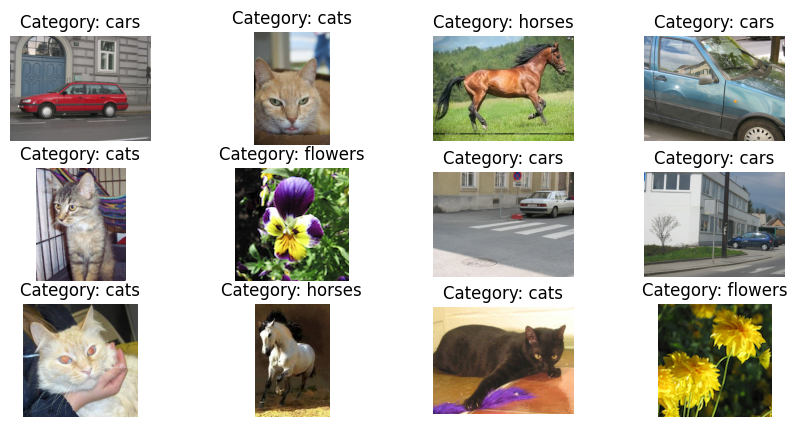

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)
for i, item in test_df.iterrows():
    img_path = item['path']
    img = mpimg.imread(img_path)
    row_index = i // 4
    col_index = i % 4

    ax[row_index, col_index].imshow(img)
    ax[row_index, col_index].set_title(f"Category: {item['category']}")
    ax[row_index, col_index].axis('off')
plt.show()

In [15]:
preds = []
for i, item in test_df.iterrows():
    preds.append(model.predict(item["path"]))


image 1/1 /content/data/cars/carsgraz_373.bmp: 480x640 1 car, 1 stop sign, 125.4ms
Speed: 6.9ms preprocess, 125.4ms inference, 3296.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/data/cats/cat.41.jpg: 640x448 1 person, 1 cat, 106.3ms
Speed: 11.6ms preprocess, 106.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/data/horses/horse-60.jpg: 480x640 1 horse, 35.8ms
Speed: 3.4ms preprocess, 35.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/data/cars/carsgraz_255.bmp: 480x640 4 cars, 35.0ms
Speed: 1.5ms preprocess, 35.0ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/data/cats/cat.2.jpg: 640x512 1 cat, 106.4ms
Speed: 3.3ms preprocess, 106.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /content/data/flowers/0138.png: 640x640 1 banana, 1 apple, 38.8ms
Speed: 3.8ms preprocess, 38.8ms inference, 2.1ms postprocess per im

In [16]:
results = [pred[0] for pred in preds]

In [17]:
seg = []
for result in results:
    if len(result) == 0:
        seg.append({"status": False, "path": result.path})
    else:
        seg.append({"status": True, "result": result[0]})

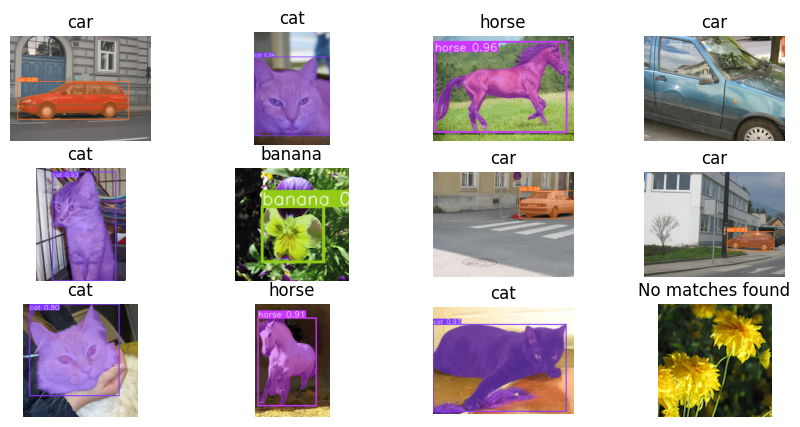

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)
for i, _ in test_df.iterrows():
    row_index = i // 4
    col_index = i % 4
    if (seg[i]["status"] == True):
        names = seg[i]["result"].names
        className = seg[i]["result"].boxes.cls
        ax[row_index, col_index].set_title(names[className[0].item()])
        ax[row_index, col_index].imshow(Image.fromarray(seg[i]["result"].plot()[:,:,::-1]))
    else:
        ax[row_index, col_index].set_title("No matches found")
        ax[row_index, col_index].imshow(mpimg.imread(img_path))

    ax[row_index, col_index].axis('off')
plt.show()